<a href="https://colab.research.google.com/github/sandeepsingh61935/Autoscaling-of-Docker-containers-using-Reactive-and-Proactive-approach/blob/main/Allmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
import pandas as pd
import numpy as np
from scipy.io import arff
from matplotlib.pylab import rcParams
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
import os
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pylab as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from math import sqrt
from sklearn.svm import SVR,NuSVR
from statsmodels.tsa.arima_model import ARIMA
from keras.models import load_model
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.metrics import mean_absolute_error
from keras.losses import MeanAbsolutePercentageError

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [ ]:
print(os.getcwd())
os.chdir('/content/drive/My Drive')
os.chdir('eightSemProject')
print(os.getcwd())

/content
/content/drive/My Drive/eightSemProject


**LSTM**

In [ ]:
#Train data
data = arff.loadarff('input_data.arff')
series = pd.DataFrame(data[0])
#train http requests
temps=pd.DataFrame(series['hits'])

#Test data
data_test = arff.loadarff('test_data.arff')
series_test = pd.DataFrame(data_test[0])
#test http requests
y_test=pd.DataFrame(series_test['hits'])
#total http requests
temps=temps.append(y_test,ignore_index = True)

dataframe=concat([temps.shift(10),temps.shift(9),temps.shift(8),temps.shift(7),temps.shift(6),temps.shift(5),temps.shift(4),temps.shift(3),temps.shift(2),temps.shift(1)], axis=1)
dataframe.columns = ['me', 'mx', 't+1','h','g','hth','w','e','r','t']
print(dataframe[0:15])
df=DataFrame()
df=dataframe[10:672]

x_test=DataFrame()
x_test=dataframe[672:]

x_train=DataFrame()
x_train=df

y_train=DataFrame()
y_train=pd.DataFrame(temps[10:672])

x_t=x_train.values
y_t=y_train.values

print(x_test)
print(y_test)

x_t=x_train.values
y_t=y_train.values

#scaling operations(train data)
scaler = MinMaxScaler(feature_range =(0, 1))
scaler = scaler.fit(x_t)
x_train=scaler.transform(x_t)
x_train=pd.DataFrame(x_train)

#scaling operations(test data)
x_te=x_test.values
scaler1 = MinMaxScaler(feature_range =(0, 1))
scaler1 = scaler1.fit(x_te)
x_test=scaler1.transform(x_te)
x_test=pd.DataFrame(x_test)

scalery = MinMaxScaler(feature_range =(0, 1))
scalery = scalery.fit(y_t)
y_train=scalery.transform(y_t)
y_train=pd.DataFrame(y_train)

         me       mx      t+1        h  ...        w        e        r        t
0       NaN      NaN      NaN      NaN  ...      NaN      NaN      NaN      NaN
1       NaN      NaN      NaN      NaN  ...      NaN      NaN      NaN   6172.0
2       NaN      NaN      NaN      NaN  ...      NaN      NaN   6172.0   5957.0
3       NaN      NaN      NaN      NaN  ...      NaN   6172.0   5957.0   5154.0
4       NaN      NaN      NaN      NaN  ...   6172.0   5957.0   5154.0   8200.0
5       NaN      NaN      NaN      NaN  ...   5957.0   5154.0   8200.0  11327.0
6       NaN      NaN      NaN      NaN  ...   5154.0   8200.0  11327.0   8565.0
7       NaN      NaN      NaN   6172.0  ...   8200.0  11327.0   8565.0   8766.0
8       NaN      NaN   6172.0   5957.0  ...  11327.0   8565.0   8766.0   8593.0
9       NaN   6172.0   5957.0   5154.0  ...   8565.0   8766.0   8593.0  12838.0
10   6172.0   5957.0   5154.0   8200.0  ...   8766.0   8593.0  12838.0  11035.0
11   5957.0   5154.0   8200.0  11327.0  

In [ ]:
x_train=x_train.to_numpy()
x_test=x_test.to_numpy()

In [ ]:
trainX = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
testX = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [ ]:
trainX.shape

(662, 1, 10)

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
epochs =30
batch_size=1
if __name__=="__main__":
  model=lo_model()
  model.save('mymodel.h5')
  callback_save = ModelCheckpoint('mymodel.h5',monitor='val_loss', save_best_only=True)
  print('Model has been loaded')
  model.fit(trainX,y_train,
			  batch_size=batch_size,
			  epochs=epochs,
			  callbacks = [callback_save],
        validation_split=0.2
)

Model has been loaded
Train on 529 samples, validate on 133 samples
Epoch 1/30
529/529 [==============================] - 1s 3ms/step - loss: 0.0332 - accuracy: 0.0000e+00 - val_loss: 0.0111 - val_accuracy: 0.0075
Epoch 2/30
529/529 [==============================] - 1s 2ms/step - loss: 0.0109 - accuracy: 0.0019 - val_loss: 0.0080 - val_accuracy: 0.0075
Epoch 3/30
529/529 [==============================] - 1s 2ms/step - loss: 0.0098 - accuracy: 0.0019 - val_loss: 0.0076 - val_accuracy: 0.0075
Epoch 4/30
529/529 [==============================] - 1s 2ms/step - loss: 0.0089 - accuracy: 0.0019 - val_loss: 0.0083 - val_accuracy: 0.0075
Epoch 5/30
529/529 [==============================] - 1s 2ms/step - loss: 0.0088 - accuracy: 0.0019 - val_loss: 0.0071 - val_accuracy: 0.0075
Epoch 6/30
529/529 [==============================] - 1s 2ms/step - loss: 0.0084 - accuracy: 0.0019 - val_loss: 0.0069 - val_accuracy: 0.0075
Epoch 7/30
529/529 [==============================] - 1s 2ms/step - loss: 0.

**Model**

In [ ]:
#final code to build model
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense
def lo_model():
  #Build the model
  model = Sequential()

  model.add(LSTM(30,input_shape=(1,10), return_sequences=False,activation='tanh', recurrent_activation='relu'))
  model.add(Dense(1,input_dim=30))
  model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])
  return model

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 30)                4920      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 4,951
Trainable params: 4,951
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Testing
predict = model.predict(testX)
scalery1=MinMaxScaler(feature_range =(0, 1))
scalery1 = scalery1.fit(y_test)
y=scalery1.inverse_transform(predict)
y=pd.DataFrame(y)
y


,0
0,7366.936523
1,7098.203125
2,6455.511230
3,6076.718750
4,6800.450684
5,7776.664551
6,6970.786133
7,8868.817383
8,9068.748047
9,10289.704102


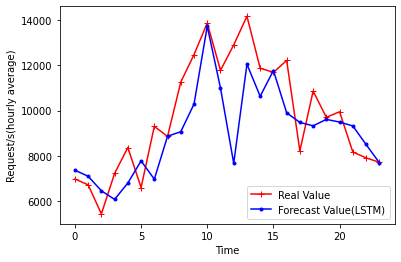

0.5329947195855189
1225.1406860351562
1668.139770994083


12.270926

In [ ]:
y.columns=['hits']
timestamp=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
time=pd.DataFrame(timestamp)
time.columns=['time']
# model evaluation
plt.plot(time['time'],y_test,color='red',marker='+',label='Real Value')
plt.plot(time['time'],y,color='blue',marker='.',label='Forecast Value(LSTM)')
plt.xlabel('Time')
# naming the y axis
plt.ylabel('Request/s(hourly average)')
plt.legend()
plt.show()
r2 = r2_score(y_test, y)
print(r2)
mae=mean_absolute_error(y_test,y)
mse = mean_squared_error(y_test, y)
rmse = np.sqrt(mse)
print(mae)
print(rmse)
#MAPE Error
mape = MeanAbsolutePercentageError()
mape(y_test, y).numpy()

**Linear Regression**

        hits
0     6172.0
1     5957.0
2     5154.0
3     8200.0
4    11327.0
..       ...
691   9705.0
692   9950.0
693   8173.0
694   7913.0
695   7717.0

[696 rows x 1 columns]
          me      mx     t+1       h  ...       ww      qww       rt      out
0        NaN     NaN     NaN     NaN  ...      NaN      NaN      NaN      NaN
1        NaN     NaN     NaN     NaN  ...      NaN      NaN      NaN   6172.0
2        NaN     NaN     NaN     NaN  ...      NaN      NaN   6172.0   5957.0
3        NaN     NaN     NaN     NaN  ...      NaN   6172.0   5957.0   5154.0
4        NaN     NaN     NaN     NaN  ...   6172.0   5957.0   5154.0   8200.0
..       ...     ...     ...     ...  ...      ...      ...      ...      ...
691  10095.0  9402.0  8580.0  8336.0  ...  11693.0  12217.0   8221.0  10864.0
692   9402.0  8580.0  8336.0  7241.0  ...  12217.0   8221.0  10864.0   9705.0
693   8580.0  8336.0  7241.0  6979.0  ...   8221.0  10864.0   9705.0   9950.0
694   8336.0  7241.0  6979.0  6719.0  ..

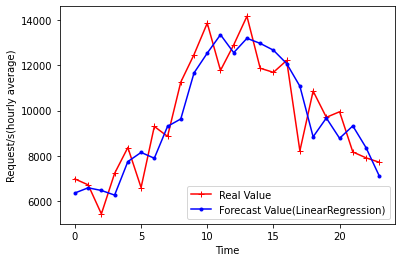

0.7641714130240459
997.7581858169387
1185.4132180399715


10.81937

In [ ]:
#input data
data = arff.loadarff('input_data.arff')
series = pd.DataFrame(data[0])

temps=pd.DataFrame(series['hits'])

#Test data
data_test = arff.loadarff('test_data.arff')
series_test = pd.DataFrame(data_test[0])
y_test=pd.DataFrame(series_test['hits'])

temps=temps.append(y_test,ignore_index = True)

print(temps)
dataframe=concat([temps.shift(24),temps.shift(23),temps.shift(22),temps.shift(21),temps.shift(20),temps.shift(19),temps.shift(18),temps.shift(17),temps.shift(16),temps.shift(15),temps.shift(14),temps.shift(13),temps.shift(12),temps.shift(11),temps.shift(10),temps.shift(9),temps.shift(8),temps.shift(7),temps.shift(6),temps.shift(5),temps.shift(4),temps.shift(3),temps.shift(2),temps.shift(1)], axis=1)
dataframe.columns = ['me', 'mx', 't+1','h','g','hth','w','e','r','t','y','i','o','p','a','s','d','m','g','ss','ww','qww','rt','out']

print(dataframe)
df=DataFrame()
df=dataframe[24:672]
x_test=DataFrame()
x_test=dataframe[672:]
x_train=DataFrame()
x_train=df
y_train=DataFrame()
y_train=pd.DataFrame(temps[24:672])

x_t=x_train.values
y_t=y_train.values

print(x_test)
print(y_test)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range =(0, 1))
scaler = scaler.fit(x_t)
x_train=scaler.transform(x_t)
x_train=pd.DataFrame(x_train)

x_te=x_test.values
scaler1 = MinMaxScaler(feature_range =(0, 1))
scaler1 = scaler1.fit(x_te)
x_test=scaler1.transform(x_te)
x_test=pd.DataFrame(x_test)

scalery = MinMaxScaler(feature_range =(0, 1))
scalery = scalery.fit(y_t)
y_train=scalery.transform(y_t)
y_train=pd.DataFrame(y_train)


regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(x_train, y_train)
# Predict
yt=regression_model.predict(x_test)
scalery1=MinMaxScaler(feature_range =(0, 1))
scalery1 = scalery1.fit(y_test)
y=scalery1.inverse_transform(yt)
y=pd.DataFrame(y)

y.columns=['hits']

timestamp=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
time=pd.DataFrame(timestamp)
time.columns=['time']

# model evaluation
plt.plot(time['time'],y_test,color='red',marker='+',label='Real Value')

plt.plot(time['time'],y,color='blue',marker='.',label='Forecast Value(LinearRegression)')
plt.xlabel('Time')
# naming the y axis
plt.ylabel('Request/s(hourly average)')
plt.legend()
plt.show()

r2 = r2_score(y_test, y)
print(r2)
mae=mean_absolute_error(y_test,y)
mse = mean_squared_error(y_test, y)
rmse = np.sqrt(mse)
print(mae)
print(rmse)
#MAPE Error
mape = MeanAbsolutePercentageError()
mape(y_test, y).numpy()

**SVR**

            0
0    0.133966
1    0.110672
2    0.013333
3    0.169908
4    0.178024
..        ...
643  0.343821
644  0.307299
645  0.263979
646  0.251120
647  0.193412

[648 rows x 1 columns]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


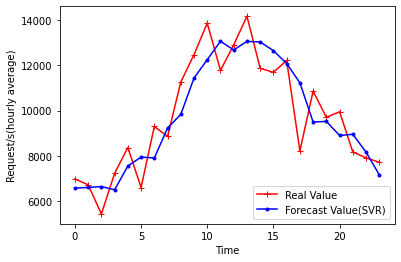

0.7851850031553295
939.1171593094695
1131.3678671835128


10.123078

In [ ]:

#input data
data = arff.loadarff('input_data.arff')
series = pd.DataFrame(data[0])

temps=pd.DataFrame(series['hits'])

#Test data
data_test = arff.loadarff('test_data.arff')
series_test = pd.DataFrame(data_test[0])
y_test=pd.DataFrame(series_test['hits'])

temps=temps.append(y_test,ignore_index = True)


dataframe=concat([temps.shift(24),temps.shift(23),temps.shift(22),temps.shift(21),temps.shift(20),temps.shift(19),temps.shift(18),temps.shift(17),temps.shift(16),temps.shift(15),temps.shift(14),temps.shift(13),temps.shift(12),temps.shift(11),temps.shift(10),temps.shift(9),temps.shift(8),temps.shift(7),temps.shift(6),temps.shift(5),temps.shift(4),temps.shift(3),temps.shift(2),temps.shift(1)], axis=1)
dataframe.columns = ['me', 'mx', 't+1','h','g','hth','w','e','r','t','y','i','o','p','a','s','d','m','g','ss','ww','qww','rt','out']


df=DataFrame()
df=dataframe[24:672]
x_test=DataFrame()
x_test=dataframe[672:]
x_train=DataFrame()
x_train=df
y_train=DataFrame()
y_train=pd.DataFrame(temps[24:672])

x_t=x_train.values
y_t=y_train.values

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range =(0, 1))
scaler = scaler.fit(x_t)
x_train=scaler.transform(x_t)
x_train=pd.DataFrame(x_train)

x_te=x_test.values
scaler1 = MinMaxScaler(feature_range =(0, 1))
scaler1 = scaler1.fit(x_te)
x_test=scaler1.transform(x_te)
x_test=pd.DataFrame(x_test)

scalery = MinMaxScaler(feature_range =(0, 1))
scalery = scalery.fit(y_t)
y_train=scalery.transform(y_t)
y_train=pd.DataFrame(y_train)
print(y_train)


model = SVR(kernel='rbf',gamma=0.002,C=10,epsilon=.027)
model.fit(x_train, y_train)
yt=pd.DataFrame(model.predict(x_test))

scalery1=MinMaxScaler(feature_range =(0, 1))
scalery1 = scalery1.fit(y_test)
y=scalery1.inverse_transform(yt)
y=pd.DataFrame(y)
y.columns=['hits']

timestamp=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
time=pd.DataFrame(timestamp)
time.columns=['time']

# model evaluation
plt.plot(time['time'],y_test,color='red',marker='+',label='Real Value')
plt.plot(time['time'],y,color='blue',marker='.',label='Forecast Value(SVR)')
plt.xlabel('Time')
# naming the y axis
plt.ylabel('Request/s(hourly average)')
plt.legend()
plt.show()

r2 = r2_score(y_test, y)
print(r2)

mae=mean_absolute_error(y_test,y)
mse = mean_squared_error(y_test, y)
rmse = np.sqrt(mse)
print(mae)
print(rmse)
#MAPE Error
mape = MeanAbsolutePercentageError()
mape(y_test, y).numpy()


**ARIMA**

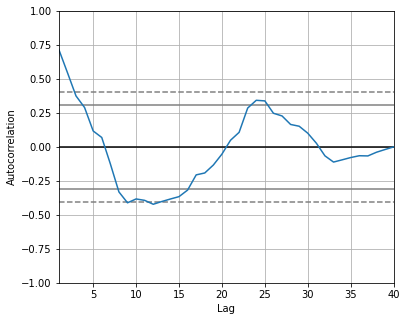

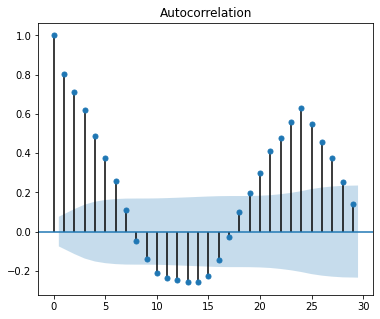

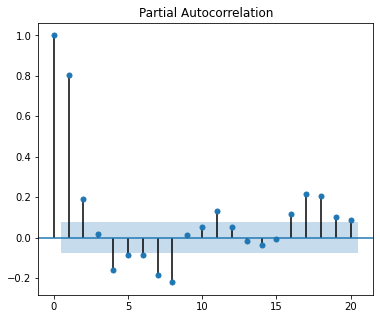

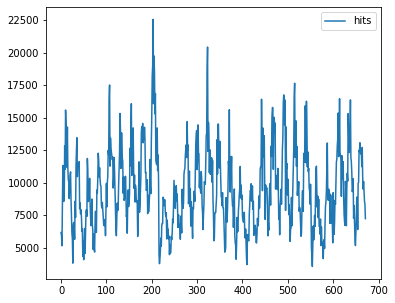

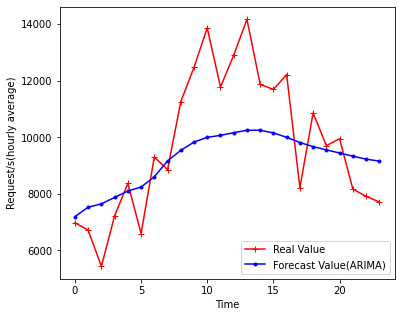

0.44451146099824257
1506.1734807773803
1819.3199949764598


15.133555

In [ ]:

rcParams['figure.figsize'] = 6, 5
data = arff.loadarff('input_data.arff')
data = pd.DataFrame(data[0])
train=data
x_train=pd.DataFrame(train['hits'])

out_data= arff.loadarff('test_data.arff')
out_df = pd.DataFrame(out_data[0])
test=out_df
y_test=pd.DataFrame(test['hits'])

train_len=672
test_len=24

xx=x_train.mean()
xx.head()
autocorrelation_plot(x_train[:40])
plot_acf(x_train)

plt.show()
plot_pacf(x_train,lags=20)
plt.show()
#p=12
#q=0

x_train.plot()
plt.show()

model = ARIMA(x_train,order=(12,0,0))
model_fit = model.fit()


predictions = model_fit.predict(start=len(x_train), end=len(x_train)+len(y_test)-1, dynamic=False)

predictions=pd.DataFrame(predictions)



timestamp=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
time=pd.DataFrame(timestamp)
time.columns=['time']
# plot results
#plt.figure(figsize=(12,6))
plt.plot(time,test['hits'],color='red',marker='+',label='Real Value')
plt.plot(time,predictions, color='blue',marker='.',label='Forecast Value(ARIMA)')
plt.xlabel('Time')
# naming the y axis
plt.ylabel('Request/s(hourly average)')

plt.legend()
plt.show()

r2 = r2_score(test['hits'], predictions)
print(r2)
from sklearn.metrics import mean_absolute_error

mae=mean_absolute_error(y_test,predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print(mae)
print(rmse)
#MAPE Error
mape = MeanAbsolutePercentageError()
mape(y_test, predictions).numpy()

**Simulation**

In [ ]:
#Train data
data = arff.loadarff('input_data.arff')
series = pd.DataFrame(data[0])

temps=pd.DataFrame(series['hits'])

#Test data
data_test = arff.loadarff('test_data.arff')
series_test = pd.DataFrame(data_test[0])
y_test=pd.DataFrame(series_test['hits'])

temps=temps.append(y_test,ignore_index = True)

print(temps)
dataframe=concat([temps.shift(10),temps.shift(9),temps.shift(8),temps.shift(7),temps.shift(6),temps.shift(5),temps.shift(4),temps.shift(3),temps.shift(2),temps.shift(1)], axis=1)
dataframe.columns = ['me', 'mx', 't+1','h','g','hth','w','e','r','t']


x_test=DataFrame()
x_test=dataframe[672:]


print(x_test)
print(y_test)
#Scaling


x_te=x_test.values
scaler1 = MinMaxScaler(feature_range =(0, 1))
scaler1 = scaler1.fit(x_te)
x_test=scaler1.transform(x_te)
x_test=pd.DataFrame(x_test)
x_test=x_test.to_numpy()
testX = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

model=load_model('mymodel.h5')
for i in range(0,24):
  sub = testX[i:i+1]
  predict = model.predict(sub)
  scalery1=MinMaxScaler(feature_range =(0, 1))
  scalery1 = scalery1.fit(y_test)
  y1=scalery1.inverse_transform(predict)
  y=pd.DataFrame(y1)
  print(y)
  cdt=10
  sdr=0.40
  R_min=5
  R_current=20
  R_estimated=int(y[0]);
  if R_current==R_estimated:
    os.system('docker service ls')
  elif R_estimated > R_current:
    cmd='docker service scale prod_awesome='+str(R_estimated)
    os.system(cmd)
    os.system('docker service ls')
    R_current = R_estimated
    cdt=10
  elif cdt==0:
    cdt=10
    R_estimated=math.floor((R_current-R_estimated)*(1-sdr))
    R_estimated=math.max(R_current-R_estimated,R_min)
    cmd='docker service scale prod_awesome='+str(R_estimated)
    R_current = R_estimated
    os.system(cmd)
    os.system('docker service ls')
  else:
    cdt=cdt-1
  time.sleep(60)




        hits
0     6172.0
1     5957.0
2     5154.0
3     8200.0
4    11327.0
..       ...
691   9705.0
692   9950.0
693   8173.0
694   7913.0
695   7717.0

[696 rows x 1 columns]
         me       mx      t+1        h  ...        w        e        r        t
0       NaN      NaN      NaN      NaN  ...      NaN      NaN      NaN      NaN
1       NaN      NaN      NaN      NaN  ...      NaN      NaN      NaN   6172.0
2       NaN      NaN      NaN      NaN  ...      NaN      NaN   6172.0   5957.0
3       NaN      NaN      NaN      NaN  ...      NaN   6172.0   5957.0   5154.0
4       NaN      NaN      NaN      NaN  ...   6172.0   5957.0   5154.0   8200.0
5       NaN      NaN      NaN      NaN  ...   5957.0   5154.0   8200.0  11327.0
6       NaN      NaN      NaN      NaN  ...   5154.0   8200.0  11327.0   8565.0
7       NaN      NaN      NaN   6172.0  ...   8200.0  11327.0   8565.0   8766.0
8       NaN      NaN   6172.0   5957.0  ...  11327.0   8565.0   8766.0   8593.0
9       NaN   6172.0